# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv("./car.csv");

# Preprossesing

In [2]:
dataset.columns = ["price", "MP", "doors", "capacity", "bSize", "safety", "ev"]
dataset = dataset.replace(
    {
     'price':{'low':1, 'med':2, 'high':3, 'vhigh':4},
     'MP':{'low':1, 'med':2, 'high':3, 'vhigh':4},
     'doors':{'5more':5},
     'capacity':{'more':5},
     'bSize':{'small':1, 'med':2, 'big':3},
     'safety':{'low':1, 'med':2, 'high':3},
     'ev':{'acc':1, 'unacc':2, "good":3, "vgood":4 },
    }
)
print(dataset)
X = dataset.drop('ev', axis=1)
y = dataset['ev']

      price  MP doors capacity  bSize  safety  ev
0         4   4     2        2      1       2   2
1         4   4     2        2      1       3   2
2         4   4     2        2      2       1   2
3         4   4     2        2      2       2   2
4         4   4     2        2      2       3   2
...     ...  ..   ...      ...    ...     ...  ..
1722      1   1     5        5      2       2   3
1723      1   1     5        5      2       3   4
1724      1   1     5        5      3       1   2
1725      1   1     5        5      3       2   3
1726      1   1     5        5      3       3   4

[1727 rows x 7 columns]


# Split Dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Run

In [4]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train);
y_pred = classifier.predict(X_test)

# Max-depth

In [5]:
print(classifier.tree_.max_depth)

12


# output Details

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 66   1   0   0]
 [  1 252   0   0]
 [  0   1  14   0]
 [  0   0   0  11]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99        67
           2       0.99      1.00      0.99       253
           3       1.00      0.93      0.97        15
           4       1.00      1.00      1.00        11

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346



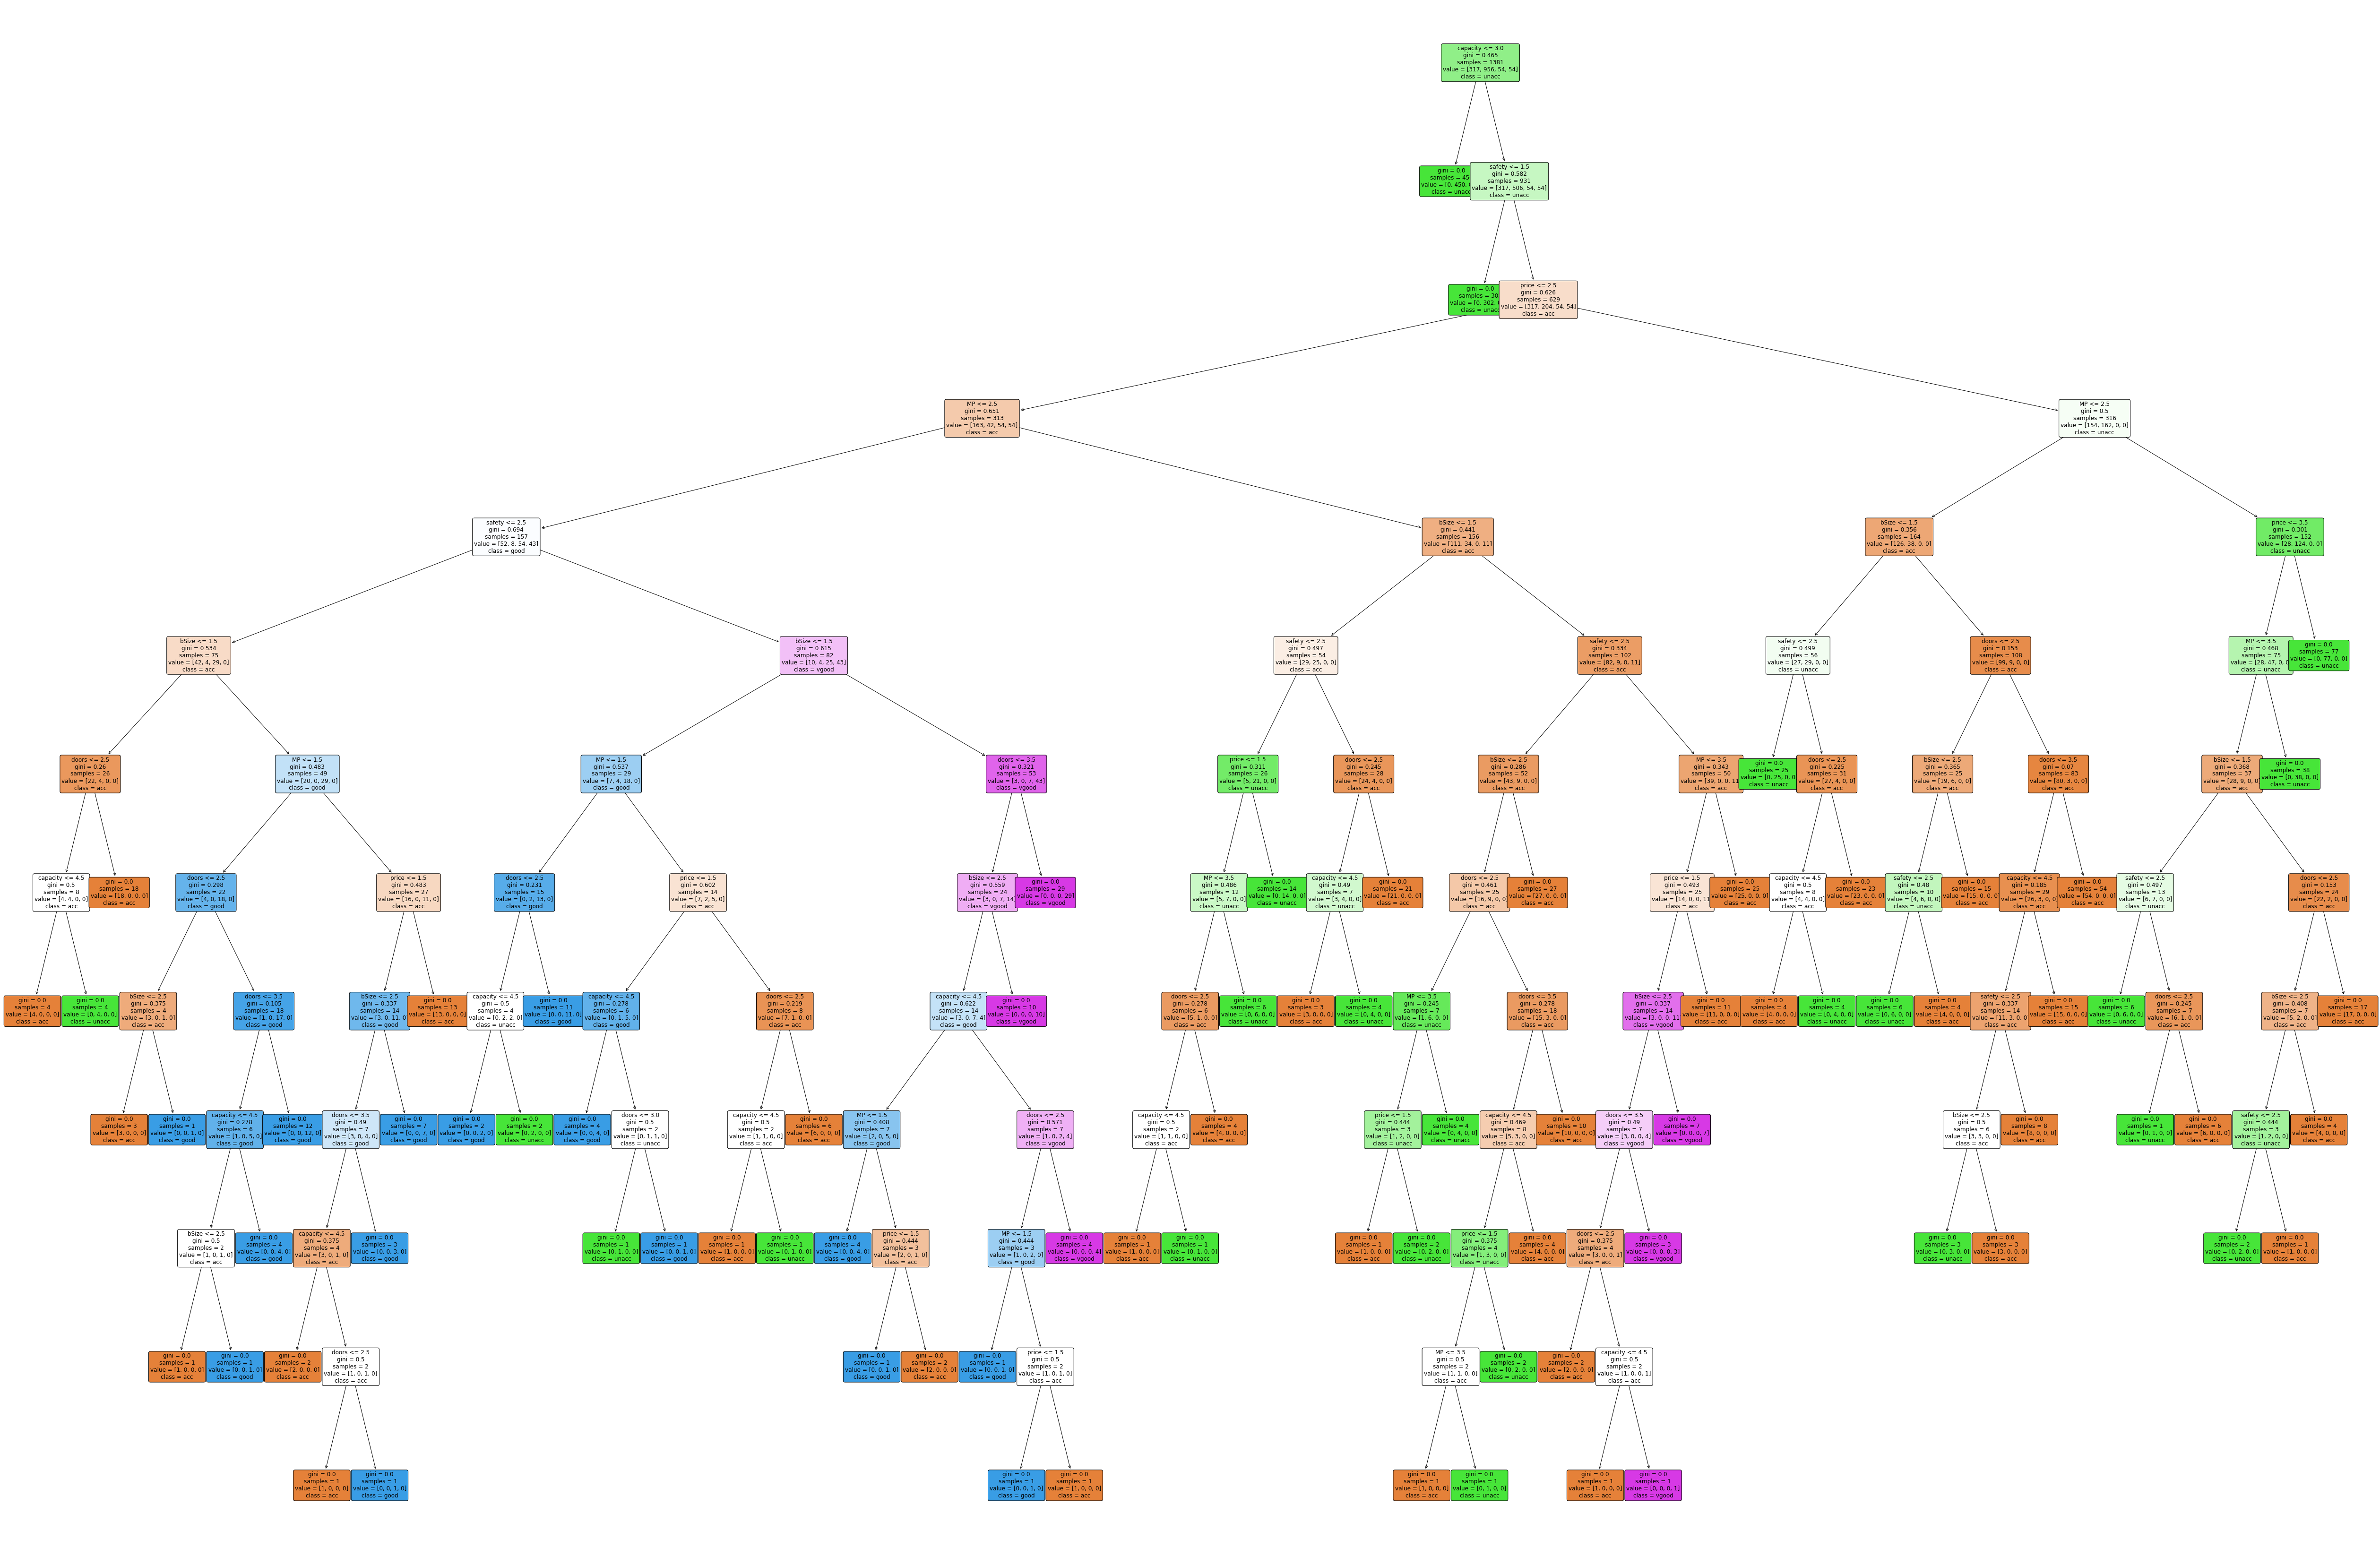

In [7]:
from sklearn import tree
plt.figure(figsize=(90,60))
dt = tree.plot_tree(classifier, 
              feature_names=["price", "MP", "doors", "capacity", "bSize", "safety", "ev"],
              class_names=['acc', 'unacc', 'good',
             'vgood'],
              filled=True, 
              rounded=True, 
              fontsize=12)
